Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [2]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
glass.shape

(214, 10)

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
glass.drop_duplicates(inplace=True)

In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [10]:
glass.Type.value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

## Data Exploration and Visualization

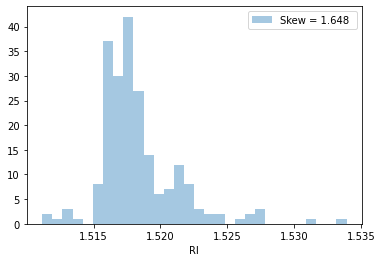

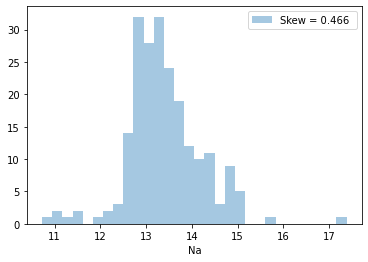

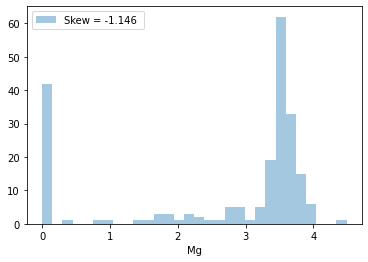

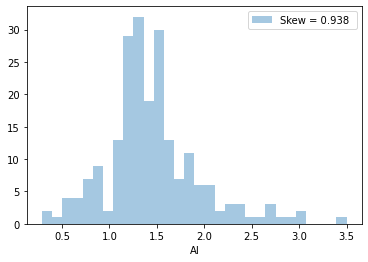

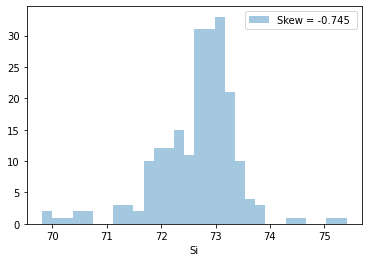

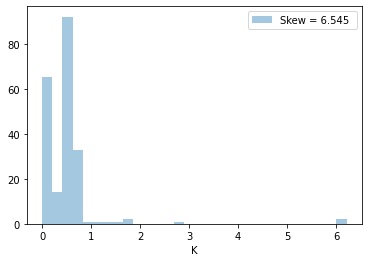

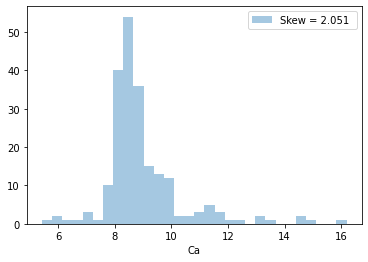

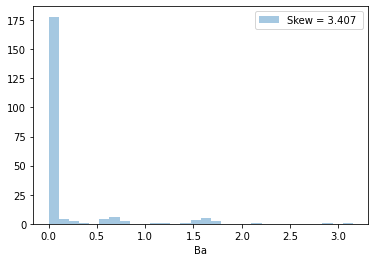

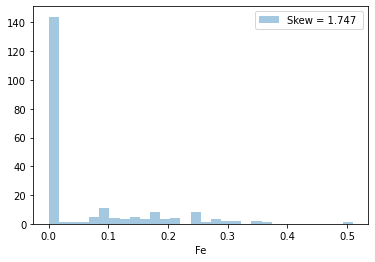

In [11]:
features = glass.columns[:-1].tolist()
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde=False, label='Skew = %0.3f '%(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Correlation Matrix

<AxesSubplot:>

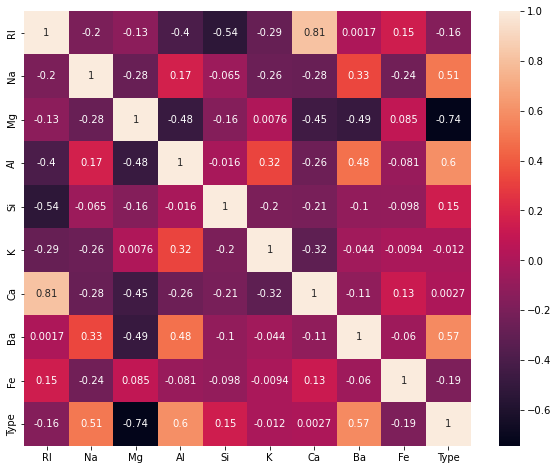

In [12]:
cor = glass.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True)

### Scatter plot of two features

<AxesSubplot:xlabel='RI', ylabel='Na'>

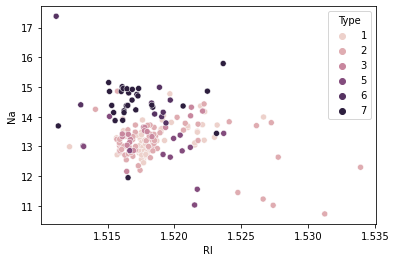

In [13]:
sns.scatterplot(glass['RI'], glass['Na'], hue=glass['Type'])

### Pairwise plot

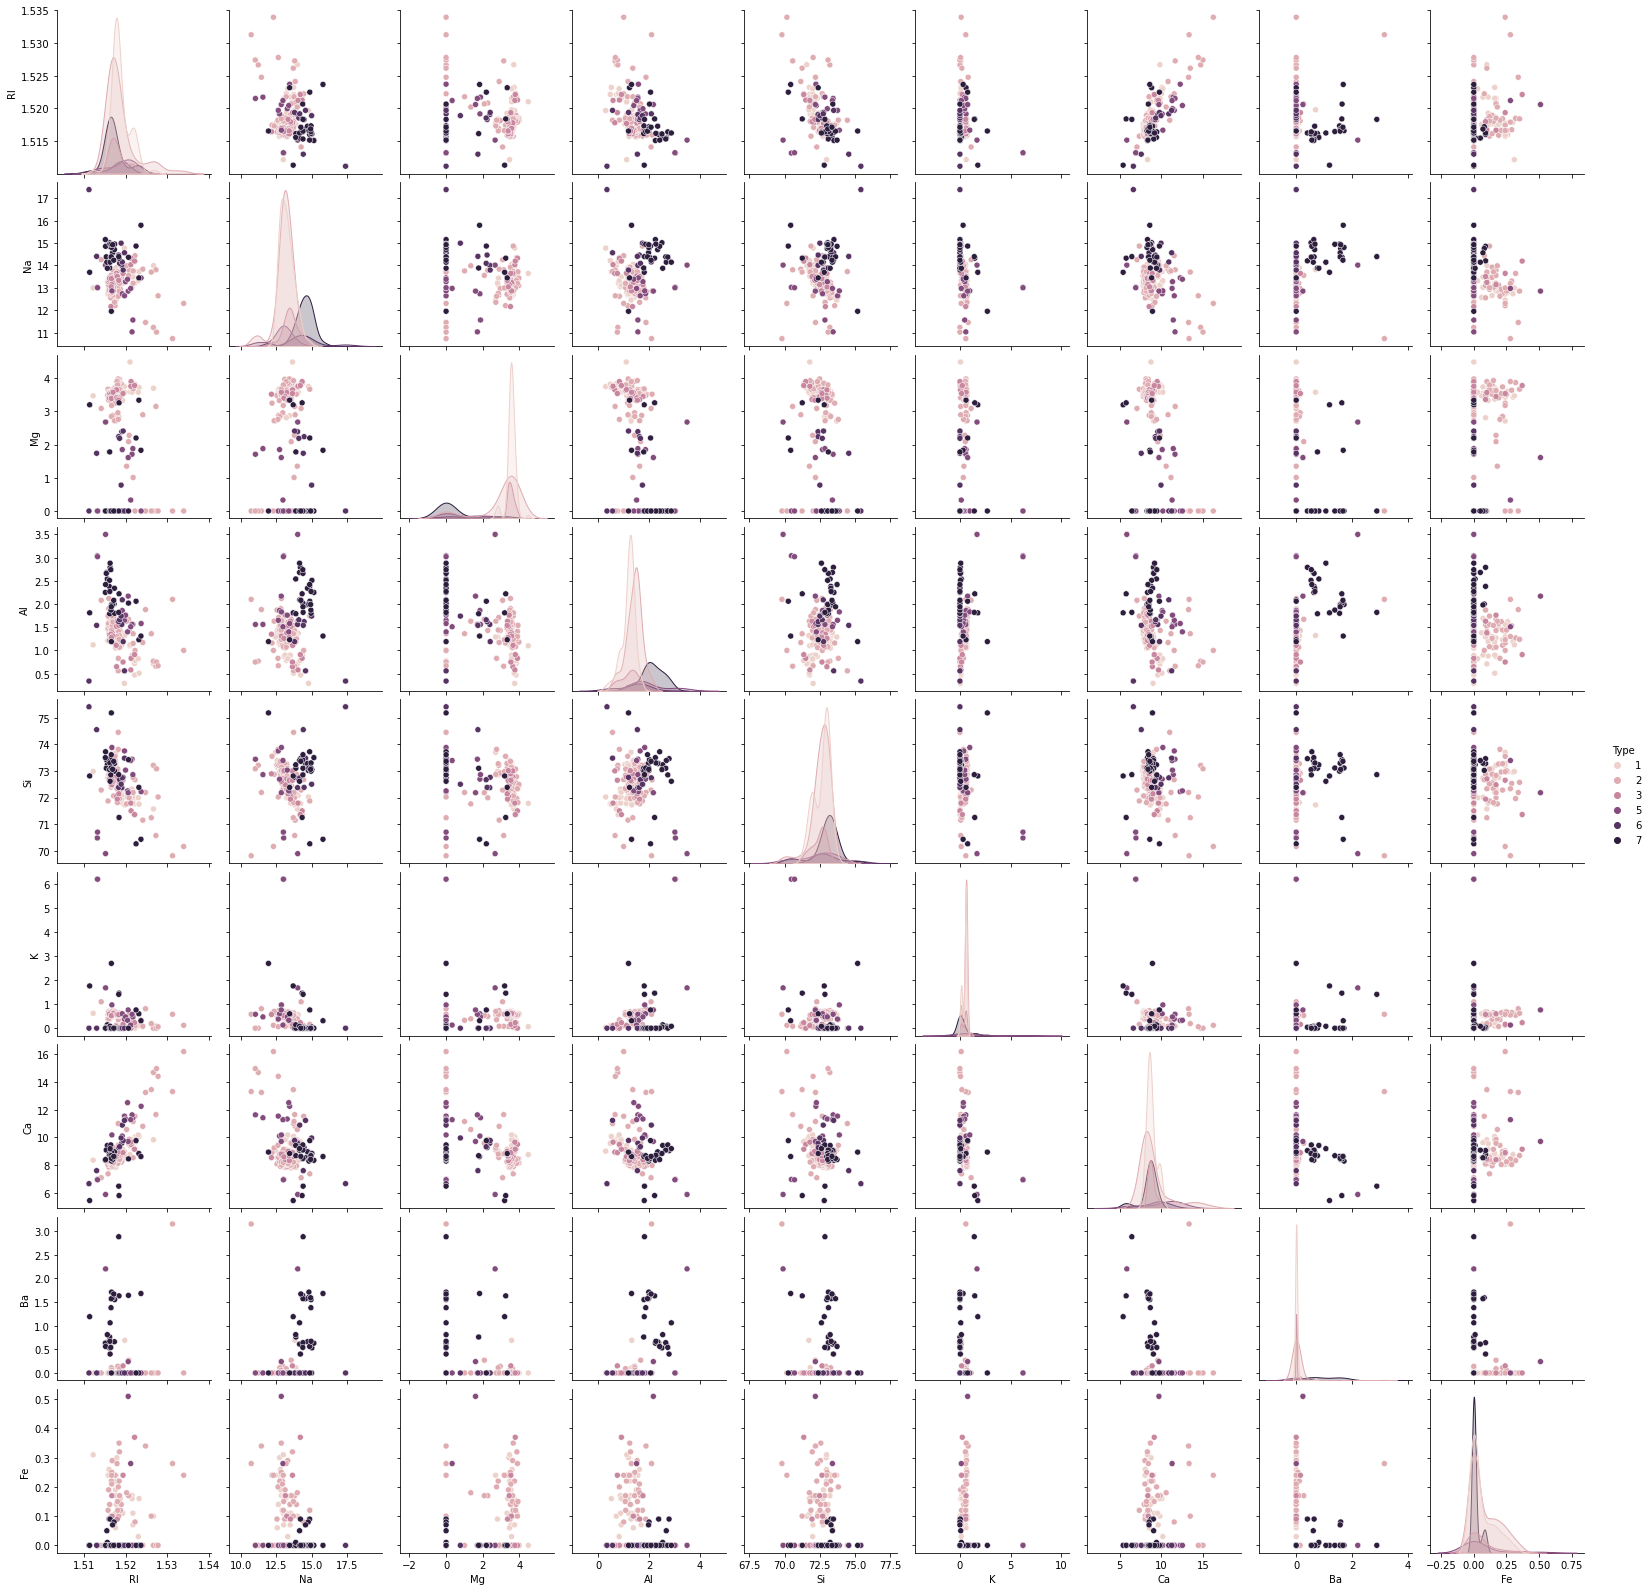

In [14]:
sns.pairplot(glass, hue='Type')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

### Feature Scaling

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(glass.drop('Type',axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

##### Perform Transformation

In [17]:
scaled_features = scaler.transform(glass.drop('Type', axis=1))
scaled_features

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [18]:
glass_feature = pd.DataFrame(scaled_features, columns=glass.columns[:-1])
glass_feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


### Applying KNN

In [19]:
glk = glass_feature.drop(['Ca','K'],axis=1)
X_train,X_test,y_train,y_test  = train_test_split(glk,glass['Type'],test_size=0.3,random_state=45) #setting random state ensures split is same eveytime, so that the results are comparable

In [20]:
knn = KNeighborsClassifier(n_neighbors=4, metric='manhattan')

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [22]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan', metric_params=None, n_jobs=None, n_neighbors=4, p=2, weights='uniform')


KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [23]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('The accuracy is {}'.format(acc))
print(classification_report(y_test, y_pred))

The accuracy is 0.6875
              precision    recall  f1-score   support

           1       0.59      0.84      0.70        19
           2       0.84      0.75      0.79        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.41      0.39      0.39        64
weighted avg       0.68      0.69      0.68        64



In [24]:
print(confusion_matrix(y_test, y_pred))

[[16  2  1  0  0  0]
 [ 5 21  1  1  0  0]
 [ 6  2  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  1  7]]


In [25]:
accuracy_score(y_test, y_pred)

0.6875

Classification Report                precision    recall  f1-score   support

           1       0.59      0.84      0.70        19
           2       0.84      0.75      0.79        28
           3       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       1.00      0.78      0.88         9

    accuracy                           0.69        64
   macro avg       0.41      0.39      0.39        64
weighted avg       0.68      0.69      0.68        64



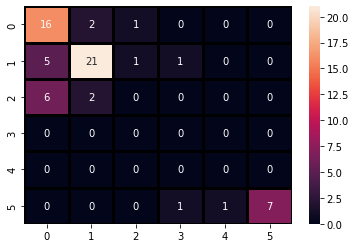

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt = "d", linecolor="k", linewidths=3)
print('Classification Report ',classification_report(y_test,y_pred))

### Finding the best K value

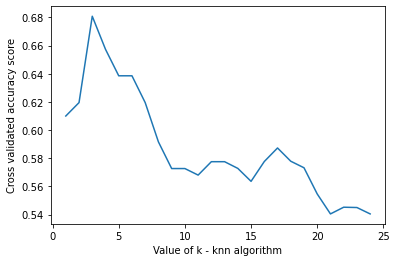

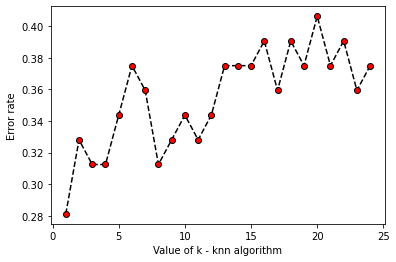

In [27]:
k_range = range(1,25)
k_scores = []
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, glk, glass['Type'], cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range, error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [28]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
pred_knn=knn_model.predict(X_test)

acc_knn= accuracy_score(y_test,pred_knn)
print("The accuracy is  {}".format(acc_knn))

The accuracy is  0.65625


Classification Report                precision    recall  f1-score   support

           1       0.45      0.74      0.56        19
           2       0.73      0.68      0.70        28
           3       0.00      0.00      0.00         8
           7       1.00      0.78      0.88         9

    accuracy                           0.62        64
   macro avg       0.55      0.55      0.53        64
weighted avg       0.59      0.62      0.60        64



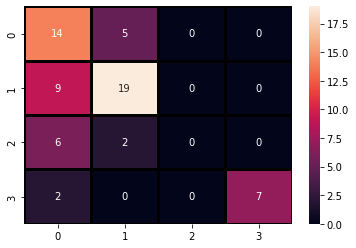

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt = "d", linecolor="k", linewidths=3)
print('Classification Report ',classification_report(y_test,y_pred))

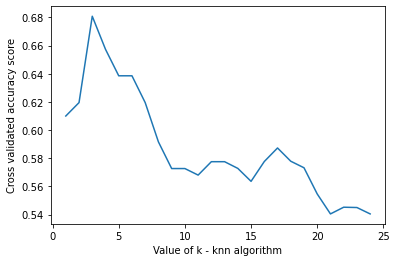

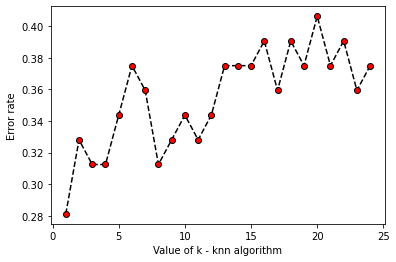

In [30]:
k_range = range(1,25)
k_scores = []
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, glk, glass['Type'], cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range, error_rate, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=6)
plt.xlabel('Value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

In [31]:
knn_model=KNeighborsClassifier(n_neighbors=7, leaf_size=30, metric='manhattan')
knn_model.fit(X_train,y_train)
pred_knn=knn_model.predict(X_test)

acc_knn= accuracy_score(y_test,pred_knn)
print("The accuracy is  {}".format(acc_knn))

The accuracy is  0.65625


Implement a KNN model to classify the animals in to categorie


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [33]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [34]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [35]:
zoo.shape

(101, 18)

In [36]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [37]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [38]:
zoo.drop('animal name', inplace=True, axis=1)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data exploration and visualization

Text(0, 0.5, 'Count')

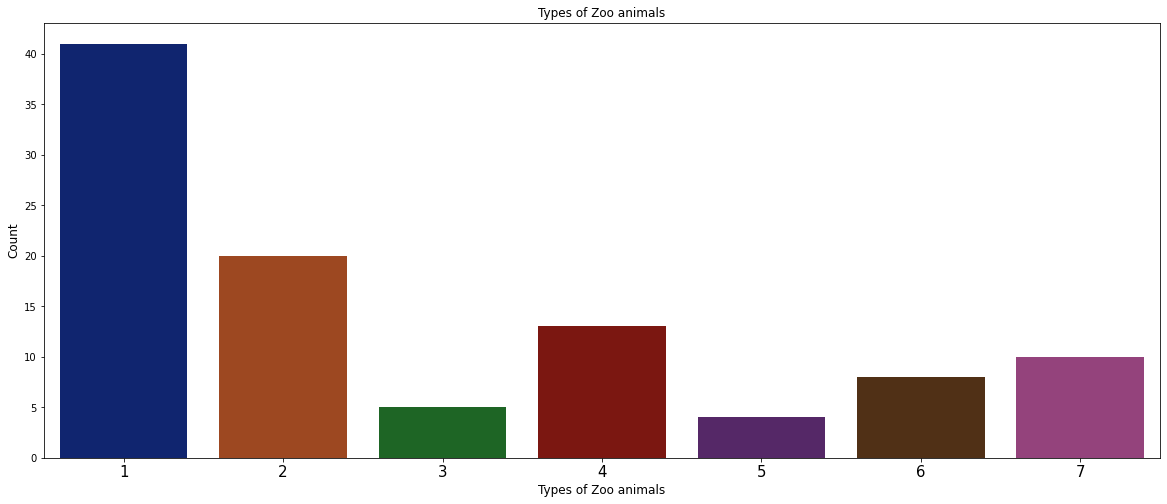

In [39]:
plt.figure(figsize=(20, 8))   
plt.title("Types of Zoo animals")
sns.countplot(data=zoo, x="type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Zoo animals", fontsize=12)
plt.ylabel("Count", fontsize=12)

### Correlation Matrix

<AxesSubplot:>

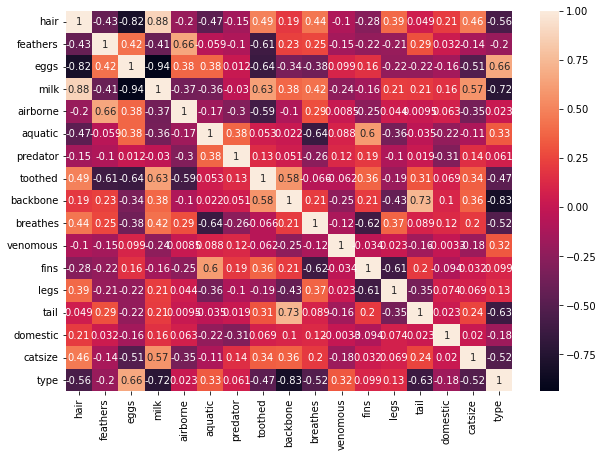

In [40]:
cor = zoo.corr()
plt.figure(figsize=[10,7])
sns.heatmap(cor, annot=True)

In [41]:
colour = [('red' if i==1 else 'blue' if i==0 else 'yellow') for i in zoo.hair]
uniqueval = list(set(colour))
uniqueval

['red', 'blue']

## Plotting scatter matrix

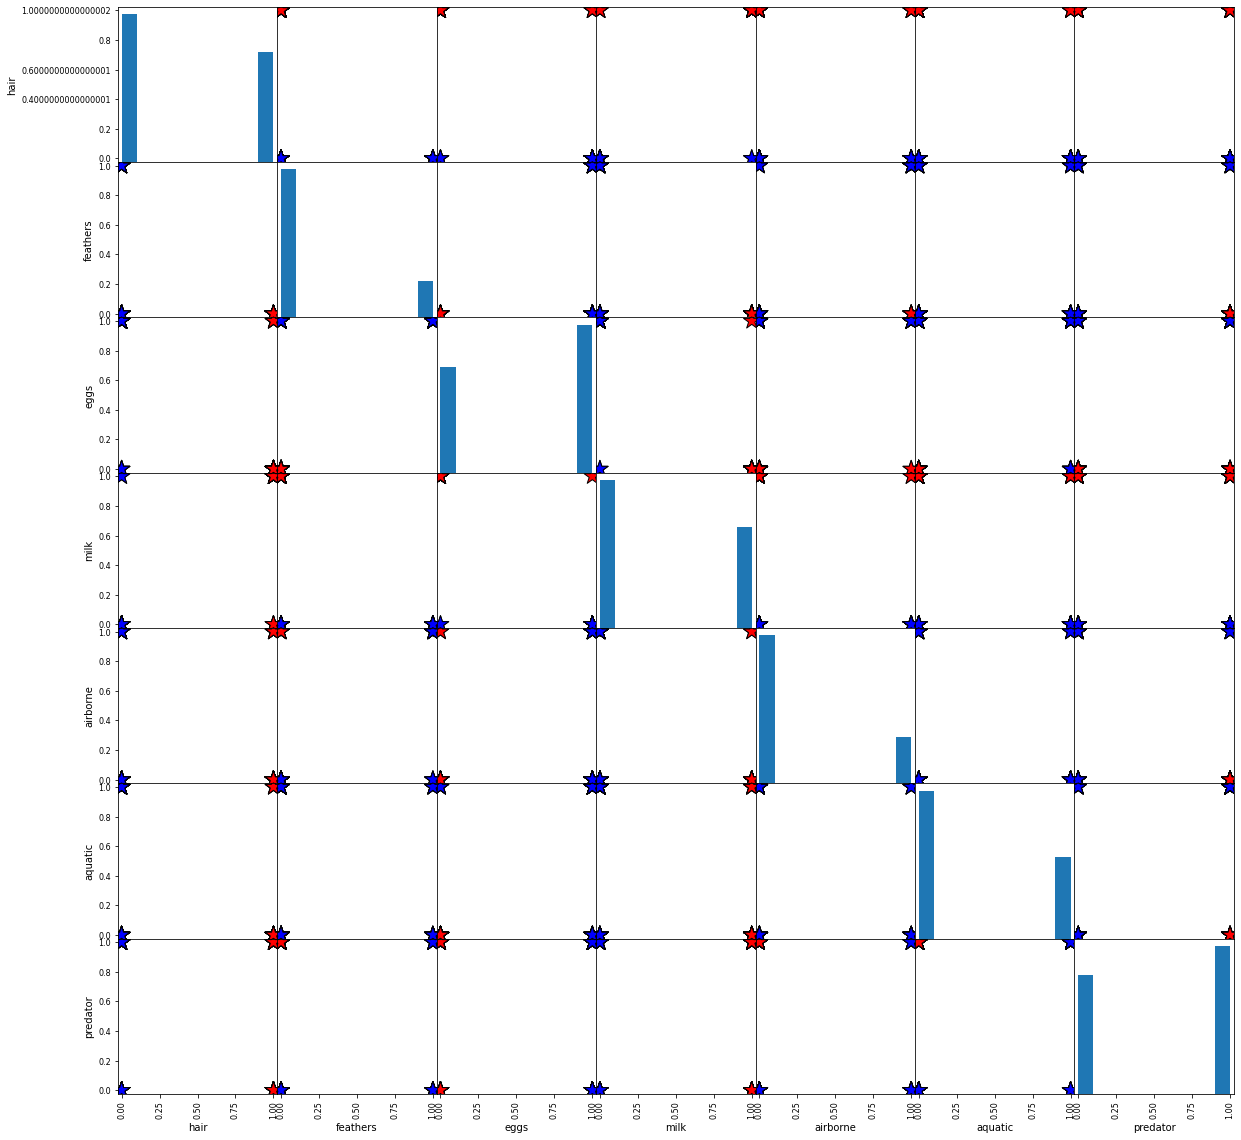

In [42]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7], c=colour, figsize=[20,20], diagonal='hist', alpha=1, s=300, marker='*', edgecolor='black')
plt.show()

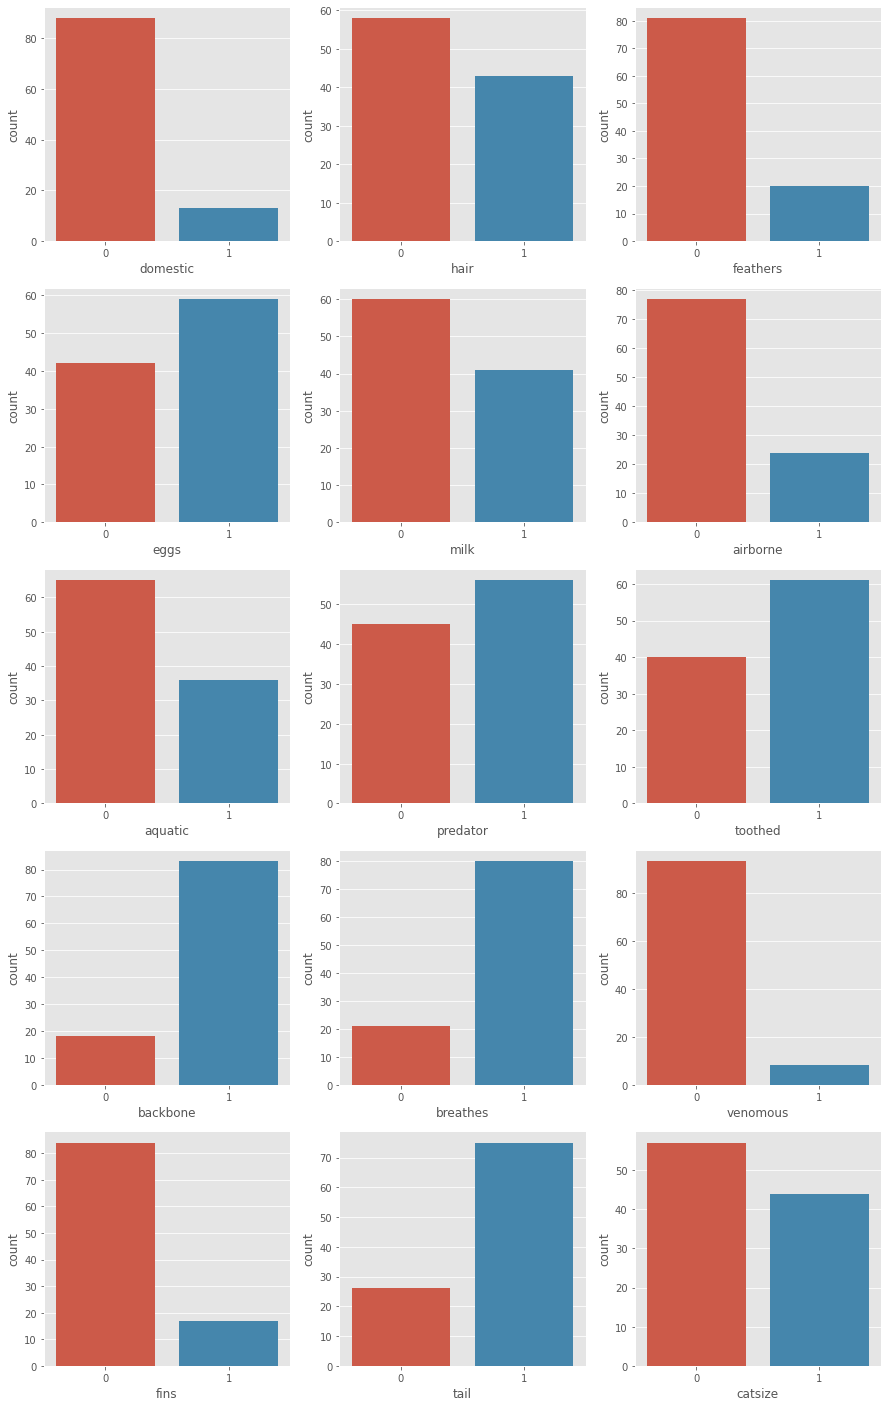

In [43]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 
sns.countplot(zoo["domestic"], ax=ax[0,0])
sns.countplot(zoo["hair"], ax=ax[0,1])
sns.countplot(zoo["feathers"], ax=ax[0,2])
sns.countplot(zoo["eggs"], ax=ax[1,0])
sns.countplot(zoo["milk"], ax=ax[1,1])
sns.countplot(zoo["airborne"], ax=ax[1,2])
sns.countplot(zoo["aquatic"], ax=ax[2,0])
sns.countplot(zoo["predator"], ax=ax[2,1])
sns.countplot(zoo["toothed"], ax=ax[2,2])
sns.countplot(zoo["backbone"], ax=ax[3,0])
sns.countplot(zoo["breathes"], ax=ax[3,1])
sns.countplot(zoo["venomous"], ax=ax[3,2])
sns.countplot(zoo["fins"], ax=ax[4,0])
sns.countplot(zoo["tail"], ax=ax[4,1])
sns.countplot(zoo["catsize"], ax=ax[4,2]);

In [44]:
x = zoo.drop('type', axis=1)
y = zoo['type']

## KNN

## Train Test Split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test, pred)
print('The accuracy is {}'.format(acc))

The accuracy is 0.9615384615384616


classification_report 

                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



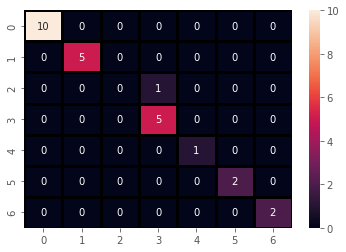

In [46]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt = 'd', linecolor='k', linewidths=3)
print('classification_report \n\n ',classification_report(y_test, pred))

In [47]:
pred_df = pd.DataFrame({'Actual':y_test, 'Predicted':pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


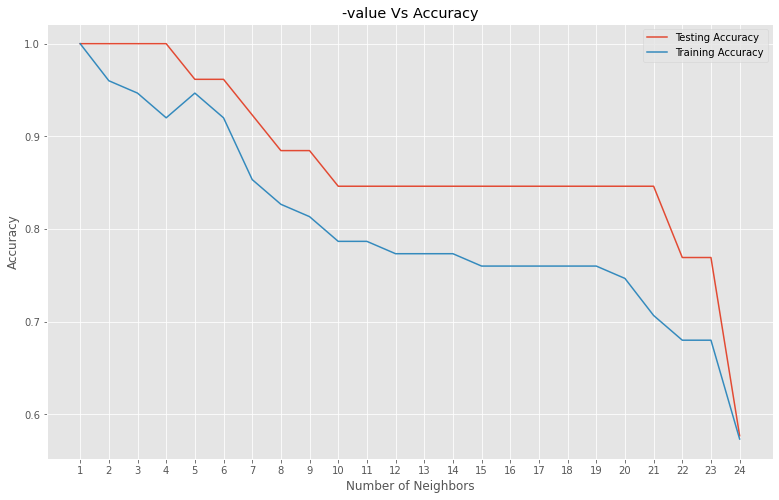

Best accuracy is 1.0 with K = 1 


In [48]:
k_values = np.arange(1,25)
train_acc = []
test_acc =[]
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
plt.figure(figsize=[13,8])
plt.plot(k_values, test_acc, label = 'Testing Accuracy')
plt.plot(k_values, train_acc, label = 'Training Accuracy')
plt.legend()
plt.title('-value Vs Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print('Best accuracy is {} with K = {} '.format(np.max(test_acc), 1+test_acc.index(np.max(test_acc))))

## Cross Validation

In [51]:
reg = LinearRegression()
k=5
cv_result = cross_val_score(reg, x, y, cv=k)
print('CV Scores : ',cv_result)
print('CV Average : ', np.sum(cv_result)/k)

CV Scores :  [0.98989494 0.95888871 0.98402387 0.81596266 0.95051652]
CV Average :  0.9398573384428681


## Ridge

In [52]:
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha= 0.001, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge Score: ",ridge.score(x_test, y_test))

Ridge Score:  0.9779262994225161


## Lasso

In [53]:
from sklearn.linear_model import Lasso
x = np.array(zoo.loc[:,['eggs', 'airborne', 'fins', 'legs', "hair", "type"]])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001, normalize = True)
lasso.fit(x_train, y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test, y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9999998459225174
Lasso coefficients:  [ 0.         -0.          0.          0.         -0.          0.99960781]


In [54]:
from sklearn.ensemble import RandomForestClassifier
x, y = zoo.loc[:,zoo.columns != "hair"], zoo.loc[:,"hair"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1 )
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confisuon Matrix: \n",cm)
print("Classification Report: \n",classification_report(y_test, y_pred))

Confisuon Matrix: 
 [[15  0]
 [ 0 16]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



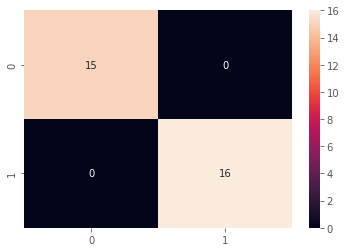

In [55]:
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#### grid search cross validation with 1 hyperparameter

In [56]:

from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best score: 0.9402852049910874
